In [1]:
%pylab inline
import platform
import IPython
import sklearn as sk
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

print ('Python version:', platform.python_version())
print ('IPython version:', IPython.__version__)
print ('numpy version:', np.__version__)
print ('scikit-learn version:', sk.__version__)
print ('matplotlib version:', matplotlib.__version__)

Populating the interactive namespace from numpy and matplotlib
Python version: 3.5.2
IPython version: 4.0.1
numpy version: 1.13.1
scikit-learn version: 0.18.2
matplotlib version: 1.5.0


In [2]:
#Ignore warnings 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Principal Component Analysis

Principal Component Analysis (PCA) is an orthogonal linear transformation that
turns a set of possibly correlated variables into a new set of variables that are as
uncorrelated as possible. The new variables lie in a new coordinate system such
that the greatest variance is obtained by projecting the data in the first coordinate,
the second greatest variance by projecting in the second coordinate, and so on.
These new coordinates are called principal components; we have as many principal
components as the number of original dimensions, but we keep only those with
high variance. Each new principal component that is added to the principal
components set must comply with the restriction that it should be orthogonal
(that is, uncorrelated) to the remaining principal components. PCA can be seen
as a method that reveals the internal structure of data; it supplies the user with a
lower dimensional shadow of the original objects. If we keep only the first principal
components, data dimensionality is reduced and thus it is easier to visualize the
structure of data. If we keep, for example, only the first and second components, we
can examine data using a two-dimensional scatter plot. As a result, PCA is useful for
exploratory data analysis before building predictive models.

For our learning methods, PCA will allow us to reduce a high-dimensional space
into a low-dimensional one while preserving as much variance as possible. It
is an unsupervised method since it does not need a target class to perform its
transformations; it only relies on the values of the learning attributes. This is very
useful for two major purposes:
    
- Visualization: Projecting a high-dimensional space, for example, into
two dimensions will allow us to map our instances into a two-dimensional
graph. Using these graphical visualizations, we can have insights about
the distribution of instances and look at how separable instances from
different classes are. In this section we will use PCA to transform and
visualize a dataset.

- Feature selection: Since PCA can transform instances from high to lower
dimensions, we could use this method to address the curse of dimensionality.
Instead of learning from the original set of features, we can transform our
instances with PCA and then apply a learning algorithm on top of the new
feature space.

As a working example, in this section we will use a dataset of handwritten digits
digitalized in matrices of 8x8 pixels, so each instance will consist initially of 64
attributes. How can we visualize the distribution of instances? Visualizing 64
dimensions at the same time is impossible for a human being, so we will use PCA
to reduce the instances to two dimensions and visualize its distribution in a
two-dimensional scatter graph.

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()
X_digits, y_digits = digits.data, digits.target

In [5]:
print (digits.keys())

dict_keys(['data', 'target', 'DESCR', 'target_names', 'images'])


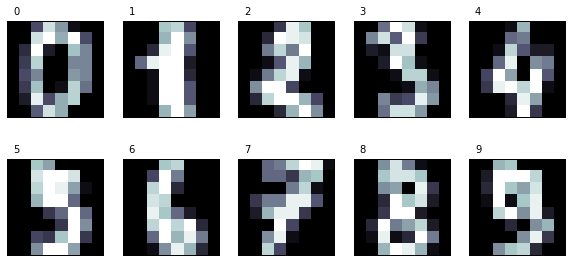

In [8]:
n_row, n_col = 2, 5

def print_digits(images, y, max_n=10):
    # set up the figure size in inches
    fig = plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    i=0
    while i < max_n and i < images.shape[0]:
        p = fig.add_subplot(n_row, n_col, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone, interpolation='nearest')
        # label the image with the target value
        p.text(0, -1, str(y[i]))
        i = i + 1

print_digits(digits.images, digits.target, max_n=10)

Define a function that will plot a scatter with the two-dimensional points that
will be obtained by a PCA transformation. Our data points will also be colored
according to their classes. Recall that the target class will not be used to perform
the transformation; we want to investigate if the distribution after PCA reveals the
distribution of the different classes, and if they are clearly separable. We will use ten
different colors for each of the digits, from 0 to 9.

In [21]:
def plot_pca_scatter():
    colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
    for i in iter(range(len(colors))):
        px = X_pca[:, 0][y_digits == i]
        py = X_pca[:, 1][y_digits == i]
        plt.scatter(px, py, c=colors[i])
        plt.legend(digits.target_names)
        plt.xlabel('First Principal Component')
        plt.ylabel('Second Principal Component')

At this point, we are ready to perform the PCA transformation. In scikit-learn,
PCA is implemented as a transformer object that learns n number of components
through the fit method, and can be used on new data to project it onto these
components. In scikit-learn, we have various classes that implement different
kinds of PCA decompositions, such as PCA, ProbabilisticPCA, RandomizedPCA,
and KernelPCA. If you need a detailed description of each, please refer to the
scikit-learn documentation. In our case, we will work with the PCA class from the
sklearn.decomposition module. The most important parameter we can change is
n_components, which allows us to specify the number of features that the obtained
instances will have. In our case, we want to transform instances of 64 features to
instances of just two features, so we will set n_components to 2.

Now we perform the transformation and plot the results:

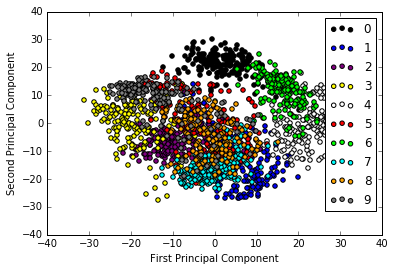

In [38]:
from sklearn.decomposition import PCA
n_components = n_row * n_col
estimator = PCA(n_components=n_components)
X_pca = estimator.fit_transform(X_digits)
plot_pca_scatter()

From the preceding figure, we can draw a few interesting conclusions:
- We can view the 10 different classes corresponding to the 10 digits at first
sight. We see that for most classes, their instances are clearly grouped in
clusters according to their target class, and also that the clusters are relatively
distinct. The exception is the class corresponding to the digit 5 with instances
very sparsely distributed over the plane overlap with the other classes.
- At the other extreme, the class corresponding to the digit 0 is the most
separated cluster. Intuitively, this class may be the one that is easiest to
separate from the rest; that is, if we train a classifier, it should be the class
with the best evaluation figures.
- Also, for topological distribution, we may predict that contiguous classes
correspond to similar digits, which means they will be the most difficult to
separate. For example, the clusters corresponding to digits 9 and 3 appear
contiguous (which will be expected as their graphical representations are
similar), so it might be more difficult to separate a 9 from a 3 than a 9 from a
4, which is on the left-hand side, far from these clusters.

Notice that we quickly got a graph that gave us a lot of insight into the problem.
This technique may be used before training a supervised classifier in order to better
understand the difficulties we may encounter. With this knowledge, we may plan
better feature preprocessing, feature selection, select a more suitable learning model,
and so on. As we mentioned before, it can also be used to perform dimension
reduction to avoid the curse of dimensionality and also may allow us to use simpler
learning methods, such as linear models.

To finish, let us look at principal component transformations. We will take the
principal components from the estimator by accessing the components attribute.
Each of its components is a matrix that is used to transform a vector from the original
space to the transformed space. In the scatter we previously plotted, we only took
into account the first two components.

We will plot all the components in the same shape as the original data (digits).

In [47]:
def print_pca_components(images, n_col, n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(comp.reshape((8, 8)), interpolation='nearest')
        plt.text(0, -1, str(i + 1) + '-component')
        plt.xticks(())
        plt.yticks(())

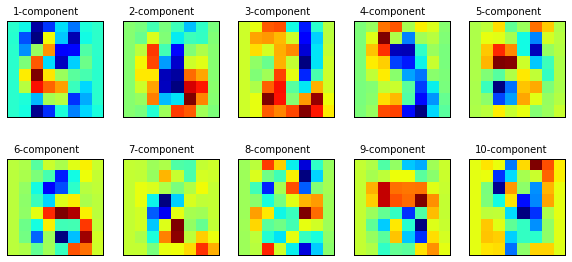

In [48]:
print_pca_components(estimator.components_[:n_components], n_col, n_row)

By taking a look at the first two components in the preceding figure, we can draw a
few interesting observations:
- If you look at the second component, you can see that it mostly highlights
the central region of the image. The digit class that is most affected by this
pattern is 0, since its central region is empty. This intuition is confirmed by
looking at our previous scatter plot. If you look at the cluster corresponding
to the digit 0, you can see it is the one that has the lower values for the second
component.
- Regarding the first component, as we see in the scatter plot, it is very
useful to separate the clusters corresponding to the digit 4 (extreme left,
low value) and the digit 3 (extreme right, high value). If you see the first
component plot, it agrees with this observation. You can see that the regions
corresponding to the zone are very similar to the digit 3, while it has color in
the zones that are characteristic of the digit 4.

If we used additional components, we will get more characteristics to be able to
separate the classes into new dimensions. For example, we could add the third
principal component and try to plot our instances in a tridimensional scatter plot.
In the next section, we will show another unsupervised group of methods: clustering
algorithms. Like dimensionality-reduction algorithms, clustering does not need to
know a target class. However, clustering methods try to group instances, looking for
those that are (in some way) similar. We will see, however, that clustering methods,
like supervised methods, can use PCA to better visualize and analyze their results.

# Clustering handwritten digits with k-means

K-means is the most popular clustering algorithm, because it is very simple and easy
to implement and it has shown good performance on different tasks. It belongs to the
class of partition algorithms that simultaneously partition data points into distinct
groups called clusters. An alternative group of methods, which we will not cover in
this book, are hierarchical clustering algorithms. These find an initial set of clusters
and divide or merge them to form new ones.
The main idea behind k-means is to find a partition of data points such that
the squared distance between the cluster mean and each point in the cluster is
minimized. Note that this method assumes that you know a priori the number of
clusters your data should be divided into.

We will show in this section how k-means works using a motivating example, the
problem of clustering handwritten digits. So, let us first import our dataset into our
Python environment and show how handwritten digits look (we will use a slightly
different version of the print_digits function we introduced in the previous section).

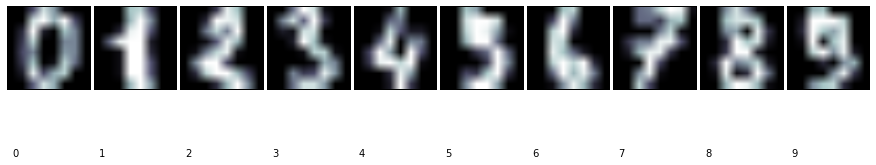

In [63]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
digits = load_digits()
data = scale(digits.data)

def print_digits(images,y,max_n=10):
    # set up the figure size in inches
    fig = plt.figure(figsize=(24, 24))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    i = 0
    while i <max_n and i <images.shape[0]:
        # plot the images in a matrix of 20x20
        p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        # label the image with the target value
        p.text(0, 14, str(y[i]))
        i = i + 1

print_digits(digits.images, digits.target, max_n=10)

As usual, we must separate train and testing sets as follows:

In [64]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(
    data, digits.target, digits.images, test_size=0.25, random_state=42)

n_samples, n_features = X_train.shape
n_digits = len(np.unique(y_train))
labels = y_train

Once we have our training set, we are ready to cluster instances. What the k-means
algorithm does is:
1. Select an initial set of cluster centers at random.
2. Find the nearest cluster center for each data point, and assign the data point
closest to that cluster.
3. Compute the new cluster centers, averaging the values of the cluster data
points, and repeat until cluster membership stabilizes; that is, until a few
data points change their clusters after each iteration.

Because of how k-means works, it can converge to local minima, and the initial
set of cluster centers could greatly affect the clusters found. The usual approach to
mitigate this is to try several initial sets and select the set with minimal value for the
sum of squared distances between cluster centers (or inertia). The implementation
of k-means in scikit-learn already does this (the n-init parameter allows us to
establish how many different centroid configurations the algorithm will try). It also
allows us to specify that the initial centroids will be sufficiently separated, leading to
better results. Let's see how this works on our dataset.

In [68]:
from sklearn import cluster
clf = cluster.KMeans(init='k-means++', n_clusters=10, random_state=42)
clf.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

The procedure is similar to the one used for supervised learning, but note that the
fit method only takes the training data as an argument. Also observe that we need
to specify the number of clusters. We can perceive this number because we know
that clusters represent numbers.

If we print the value of the labels_ attribute of the classifier, we get a list of the
cluster numbers associated to each training instance.

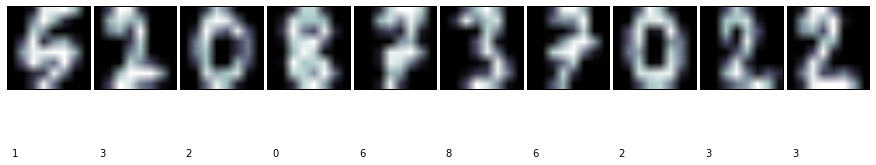

In [69]:
print_digits(images_train, clf.labels_, max_n=10)

Note that the cluster number has nothing to do with the real number value.
Remember that we have not used the class to classify; we only grouped images by
similarity. Let's see how our algorithm behaves on the testing data.
To predict the clusters for training data, we use the usual predict method of
the classifier.

In [70]:
y_pred=clf.predict(X_test)

Let us see how clusters look:

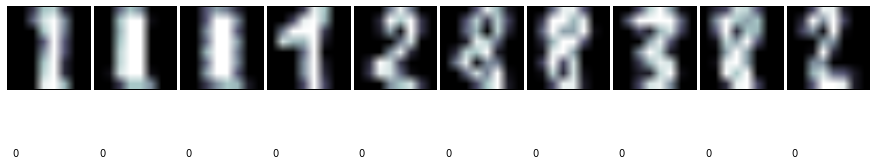

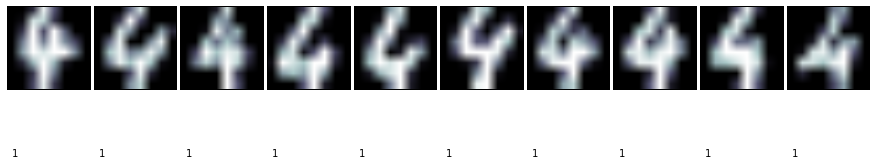

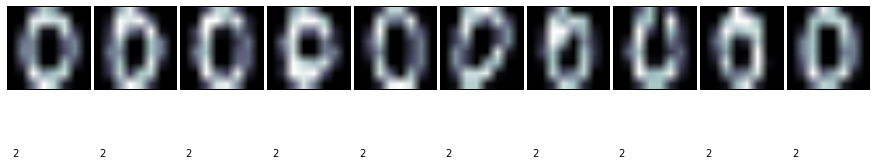

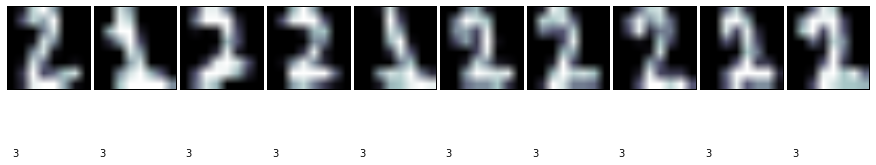

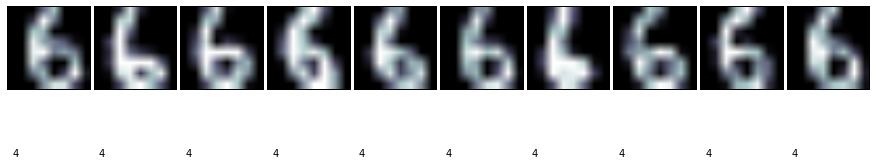

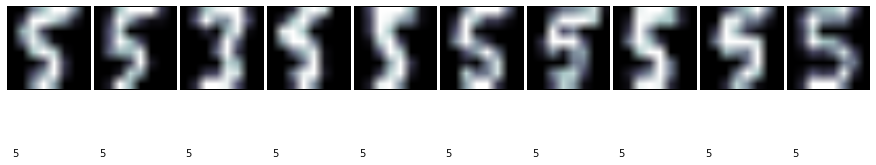

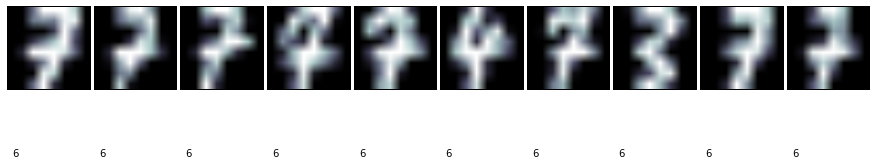

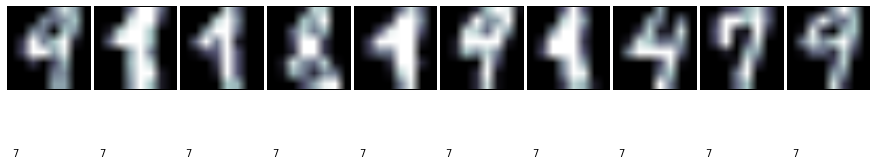

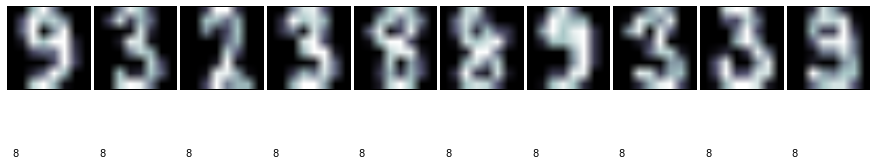

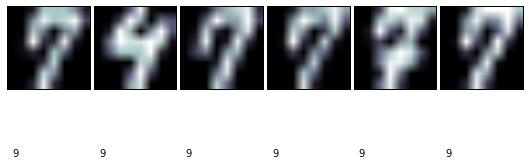

In [71]:
def print_cluster(images, y_pred, cluster_number):
    images = images[y_pred==cluster_number]
    y_pred = y_pred[y_pred==cluster_number]
    print_digits(images, y_pred,max_n=10)

for i in range(10):
    print_cluster(images_test, y_pred, i)

This code shows ten images from each cluster. Some clusters are very clear. Cluster number 2 corresponds to zeros. What about cluster number 7? It is not so clear. It seems cluster 7 is something like drawn numbers that look
similar to the digit nine. Cluster number 9 only has six instances, as shown in the
following figure:

It must be clear after reading that we are not classifying images here (as in the face
examples in the previous chapter). We are grouping into ten classes (you can try
changing the number of clusters and see what happens).

How can we evaluate our performance? Precision and all that stuff does not work,
since we have no target classes to compare with. To evaluate, we need to know the
"real" clusters, whatever that means. We can suppose, for our example, that each
cluster includes every drawing of a certain number, and only that number. Knowing
this, we can compute the adjusted Rand index between our cluster assignment and
the expected one. The Rand index is a similar measure for accuracy, but it takes into
account the fact that classes can have different names in both assignments. That is, if
we change class names, the index does not change. The adjusted index tries to deduct
from the result coincidences that have occurred by chance. When you have the exact
same clusters in both sets, the Rand index equals one, while it equals zero when
there are no clusters sharing a data point.

In [72]:
from sklearn import metrics
print ("Adjusted rand score: {:.2}".format(metrics.adjusted_rand_score(y_test, y_pred)))

Adjusted rand score: 0.57


We can also print the confusion matrix as follows:

In [73]:
print (metrics.confusion_matrix(y_test, y_pred))

[[ 0  0 43  0  0  0  0  0  0  0]
 [20  0  0  7  0  0  0 10  0  0]
 [ 5  0  0 31  0  0  0  1  1  0]
 [ 1  0  0  1  0  1  4  0 39  0]
 [ 1 50  0  0  0  0  1  2  0  1]
 [ 1  0  0  0  1 41  0  0 16  0]
 [ 0  0  1  0 44  0  0  0  0  0]
 [ 0  0  0  0  0  1 34  1  0  5]
 [21  0  0  0  0  3  1  2 11  0]
 [ 0  0  0  0  0  2  3  3 40  0]]


Observe that the class 0 in the test set (which coincides with number 0 drawings) is
completely assigned to the cluster number 2. We have problems with number 8: 21
instances are assigned class 0, while 11 are assigned class 8, and so on. Not so good
after all.

If we want to graphically show how k-means clusters look like, we must plot them
on a two-dimensional plane. We have learned how to do that in the previous section:
Principal Component Analysis (PCA). Let's construct a meshgrid of points (after
dimensionality reduction), calculate their assigned cluster, and plot them.

This example is taken from the very nice scikit-learn tutorial at
http://scikit-learn.org/.

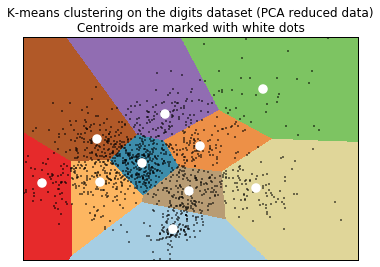

In [84]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2).fit(X_train)
reduced_X_train = pca.transform(X_train)
# Step size of the mesh.
h = .01
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = reduced_X_train[:, 0].min() + 1, reduced_X_train[:, 0].max() - 1
y_min, y_max = reduced_X_train[:, 1].min() + 1, reduced_X_train[:, 1].max() - 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
kmeans = cluster.KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(reduced_X_train)
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(),
    yy.max()), cmap=plt.cm.Paired, aspect='auto', origin='lower')
plt.plot(reduced_X_train[:, 0], reduced_X_train[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],marker='.', s=169, linewidths=3, color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA reduced data)\nCentroids are marked with white dots')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

# Alternative clustering methods

The scikit-learn toolkit includes several clustering algorithms, all of them including
similar methods and parameters to those we used in k-means. In this section we will
briefly review some of them, suggesting some of their advantages.

A typical problem for clustering is that most methods require the number of
clusters we want to identify. The general approach to solve this is to try different
numbers and let an expert determine which works best using techniques such
as dimensionality reduction to visualize clusters. There are also some methods
that try to automatically calculate the number of clusters. Scikit-learn includes an
implementation of Affinity Propagation, a method that looks for instances that are
the most representative of others, and uses them to describe the clusters. Let's see
how it works on our digit-learning problem:

In [85]:
aff = cluster.AffinityPropagation()
aff.fit(X_train)
print (aff.cluster_centers_indices_.shape)

(112,)


Affinity propagation detected 112 clusters in our training set. It seems, after all, that
the numbers are not so similar between them. You can try drawing the clusters using
the print_digits function, and see which clusters seemed to group. The cluster_
centers_indices_ attribute represents what Affinity Propagation found as the
canonical elements of each cluster.

Another method that calculates cluster number is MeanShift(). If we apply it to our
example, it detects 18 clusters as follows:

In [86]:
ms = cluster.MeanShift()
ms.fit(X_train)
print (ms.cluster_centers_.shape)

(18, 64)


In this case, the cluster_centers_ attribute shows the hyperplane cluster centroids.
The two previous examples show that results can vary a lot depending on the
method we are using. Which clustering method to use depends on the problem we
are solving and the type of clusters we want to find.

Note that, for the last two methods, we cannot use the Rand score to evaluate
performance because we do not have a canonical set of clusters to compare with.
We can, however, measure the inertia of the clustering, since inertia is the sum
of distances from each data point to the centroid; we expect near-zero numbers.
Unfortunately, there is currently no way in scikit-learn to measure inertia except for
the k-means method.

Finally, we will try a probabilistic approach to clustering, using Gaussian Mixture
Models (GMM). We will see, from a procedural view, that it is very similar to
k-means, but their theoretical principles are quite different. GMM assumes that data
comes from a mixture of finite Gaussian distributions with unknown parameters. A
Gaussian distribution is a well-known distribution function within statistics used to
model many phenomena. It has a bell shaped function centered in the mean value;
you have probably seen the following drawing before:

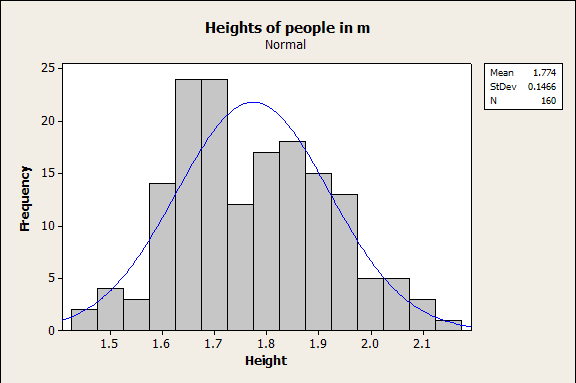

In [87]:
from IPython.core.display import Image
Image(filename='people_mean.png')

If we take a sufficiently large sample of men and measure their height, the histogram
(proportion of men with each specific height) can be adjusted by a Gaussian
distribution with mean 1.774 meters and standard deviation of 0.1466 meters. Mean
indicates the most probable value (which coincides with the peak of the curve),
and standard deviation indicates how spread out the results are; that is, how far
they can appear from the mean values. If we measure the area beneath the curve
(that is, its integral) between two specific heights, we can know, given a man, how
probable it is that his height lies between the two values, in case the distribution is
correct. Now, why should we expect that distribution and not another? Actually,
not every phenomenon has the same distribution, but a theorem called the Law of
Large Numbers tells us that whenever we repeat an experiment a large number of
times (for example, measuring somebody's height), the distribution of results can be
approximated by a Gaussian.

Generally, we have a multivariate (that is, involving more than one feature)
distribution, but the idea is the same. There is a point in the hyperplane (the mean)
most instances will be closer to; when we move away from the mean, the probability
of finding a point in the cluster will decrease. How far this probability decreases is
dependent on the second parameter, the variance. As we said, GMM assumes each
cluster has a multivariate normal distribution, and the method objective is to find
the k centroids (estimating mean and variance from training data using an algorithm
called Expectation-Maximization (EM)) and assign each point to the nearest mean.
Let's see how it works on our example.

In [95]:
from sklearn import mixture
gm = mixture.GMM(n_components=n_digits, covariance_type='tied', random_state=42)
gm.fit(X_train)

GMM(covariance_type='tied', init_params='wmc', min_covar=0.001,
  n_components=10, n_init=1, n_iter=100, params='wmc', random_state=42,
  tol=0.001, verbose=0)

You can observe that the procedure is exactly the same as the one we used for
k-means. covariance_type is a method parameter that indicates how we expect
features; that is, each pixel to be related. For example, we can suppose that they are
independent, but we can also expect that closer points are correlated, and so on. For
the moment, we will use the tied covariance type. In the next chapter, we will show
some techniques to select between different parameter values.

Let's see how it performs on our testing data:

In [96]:
# Print train clustering and confusion matrix
y_pred = gm.predict(X_test)
print ("Adjusted rand score:{:.2}".format(metrics.adjusted_rand_score(y_test, y_pred)))
print ("Homogeneity score:{:.2}".format(metrics.homogeneity_score(y_test, y_pred)))
print ("Completeness score: {:.2}".format(metrics.completeness_score(y_test, y_pred)))

Adjusted rand score:0.65
Homogeneity score:0.75
Completeness score: 0.8


Compared to k-means, we achieved a better Rand score (0.65 versus 0.59), indicating
that we have better aligned our clusters with the original digits. We also included
two interesting measures included in sklearn.metrics. Homogeneity is a number
between 0.0 and 1.0 (greater is better). A value of 1.0 indicates that clusters only
contain data points from a single class; that is, clusters effectively group similar
instances. Completeness, on the other hand, is satisfied when every data point of
a given class is within the same cluster (meaning that we have grouped all possible
instances of the class, instead of building several uniform but smaller clusters).
We can see homogeneity and completeness as the unsupervised versions of
precision and recall.

# Summary
In this chapter we presented some of the most important unsupervised learning
methods. We did not intend to provide you with an exhaustive introduction to all
the possible methods, but instead a brief introduction to these kinds of techniques.
We described how we can use unsupervised algorithms to perform a quick data
analysis to understand the behavior of the dataset and also perform dimensionality
reduction. Both applications are very useful as a step before applying a supervised
learning method. We also applied unsupervised learning techniques such as k-means
to resolve problems without using a target class—a very useful way to create
applications on top of untagged data.